In [1]:
!pip install kaggle
from google.colab import files

# Upload your Kaggle API key
files.upload()  # Upload 'kaggle.json' file (you need to download it from Kaggle account)

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0
100% 5.18G/5.20G [00:51<00:00, 125MB/s]
100% 5.20G/5.20G [00:51<00:00, 109MB/s]


In [2]:
!unzip skin-cancer-mnist-ham10000.zip


Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

In [3]:
from google.colab import files

# Upload the zip file from your local system
uploaded = files.upload()  # This will prompt a dialog to select and upload your zip file


Saving generated_images.zip to generated_images.zip


In [4]:
import zipfile
import os

# Define the path for the zip file and extraction folder
zip_file_name = 'generated_images.zip'
synthetic_images_dir = '/content/generated_images/'  # This will be your unzipped folder

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(synthetic_images_dir)

print(f"Synthetic images extracted to: {synthetic_images_dir}")


Synthetic images extracted to: /content/generated_images/


In [5]:
import pandas as pd
import numpy as np

# Load the original dataset from CSV file
real_data = pd.read_csv('/content/hmnist_8_8_RGB.csv')
real_images = real_data.iloc[:, 1:].values.reshape(-1, 8, 8, 3)  # Assuming RGB images, reshaping to (8,8,3)
real_labels = real_data.iloc[:, 0].values  # Assuming labels are in the first column

print(f"Real images shape: {real_images.shape}")
print(f"Real labels shape: {real_labels.shape}")


Real images shape: (10015, 8, 8, 3)
Real labels shape: (10015,)


In [6]:
from PIL import Image
import os
import numpy as np

# Path to the extracted synthetic images directory
synthetic_images_dir = '/content/generated_images/'

# List of synthetic image file paths, only include files that are images (e.g., '.png', '.jpg')
synthetic_image_files = [os.path.join(synthetic_images_dir, fname)
                         for fname in os.listdir(synthetic_images_dir)
                         if os.path.isfile(os.path.join(synthetic_images_dir, fname))
                         and fname.endswith(('.png', '.jpg', '.jpeg'))]  # Add extensions as needed

# Load and resize synthetic images to match real images shape (8x8, RGB)
synthetic_images = []
for file in synthetic_image_files:
    try:
        img = Image.open(file).resize((8, 8))  # Resize to (8,8)
        img = np.array(img)  # Convert image to numpy array
        if img.shape == (8, 8, 3):  # Ensure the image is in RGB format
            synthetic_images.append(img)
    except Exception as e:
        print(f"Error processing file {file}: {e}")

# Convert list to numpy array
synthetic_images = np.array(synthetic_images)
print(f"Synthetic images shape: {synthetic_images.shape}")


Synthetic images shape: (0,)


In [7]:
import os

# List contents of the synthetic images directory
synthetic_images_dir = '/content/generated_images/'
contents = os.listdir(synthetic_images_dir)
print("Contents of the directory:", contents)


Contents of the directory: ['generated_images']


In [11]:
from PIL import Image
import os
import numpy as np

# Path to the extracted synthetic images directory
synthetic_images_dir = '/content/generated_images/'

# Walk through the directory to get all image file paths (including subdirectories)
synthetic_image_files = []
for root, dirs, files in os.walk(synthetic_images_dir):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):  # Adjust extensions if needed
            synthetic_image_files.append(os.path.join(root, file))

# Load and resize synthetic images to match real images shape (8x8, RGB)
synthetic_images = []
for file in synthetic_image_files:
    try:
        img = Image.open(file).resize((8, 8))  # Resize to (8,8)
        img = np.array(img)  # Convert image to numpy array
        if img.shape == (8, 8, 3):  # Ensure the image is in RGB format
            synthetic_images.append(img)
    except Exception as e:
        print(f"Error processing file {file}: {e}")

# Convert list to numpy array
synthetic_images = np.array(synthetic_images)
print(f"Synthetic images shape: {synthetic_images.shape}")


Synthetic images shape: (1000, 8, 8, 3)


In [13]:
# Check the shape of the real images DataFrame
print(real_images_df.shape)


(10016, 193)


In [12]:
# Load CSV without enforcing dtype
real_images_df = pd.read_csv('/content/hmnist_8_8_RGB.csv', header=None)

# Display the first few rows to identify any non-numeric data
print(real_images_df.head())

# Check the data types of the columns
print(real_images_df.dtypes)


         0          1          2          3          4          5    \
0  pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005   
1        199        156        188        210        165        198   
2        115         87        115        180        133        158   
3        203        146        164        209        144        153   
4        135         96        110        198        141        156   

         6          7          8          9    ...        183        184  \
0  pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel0183  pixel0184   
1        216        176        203        215  ...        214        167   
2        200        153        187        215  ...        207        167   
3        217        160        181        215  ...        211        160   
4        208        148        158        210  ...        179        141   

         185        186        187        188        189        190  \
0  pixel0185  pixel0186  pixel0187  pixel0188

<ipython-input-12-0811a251a363>:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192) have mixed types. Specify dtype option on import or set low_memory=False.
  real_images_df = pd.read_csv('/content/hmnist_8_8_RGB.csv', header=None)


In [14]:
# Try to load the CSV while skipping non-numeric rows or columns
real_images_df = pd.read_csv('/content/hmnist_8_8_RGB.csv', header=None, skiprows=1)  # Skip first row if it contains strings

# Check the first few rows again
print(real_images_df.head())

# Convert the DataFrame to numeric (this will automatically coerce non-numeric values to NaN)
real_images_df = real_images_df.apply(pd.to_numeric, errors='coerce')

# Drop any rows or columns containing NaN values (which indicate non-numeric data)
real_images_df.dropna(inplace=True)

# Check the shape and dtype after cleaning
print(real_images_df.shape)
print(real_images_df.dtypes)


   0    1    2    3    4    5    6    7    8    9    ...  183  184  185  186  \
0  199  156  188  210  165  198  216  176  203  215  ...  214  167  191  199   
1  115   87  115  180  133  158  200  153  187  215  ...  207  167  188  177   
2  203  146  164  209  144  153  217  160  181  215  ...  211  160  175  199   
3  135   96  110  198  141  156  208  148  158  210  ...  179  141  157  153   
4  204  156  187  232  185  216  236  196  220  217  ...  236  189  213  233   

   187  188  189  190  191  192  
0  157  175  184  143  167    2  
1  128  138   74   51   60    2  
2  152  172  177  138  158    2  
3  122  138   58   39   46    2  
4  182  209  207  175  188    2  

[5 rows x 193 columns]
(10015, 193)
0      int64
1      int64
2      int64
3      int64
4      int64
       ...  
188    int64
189    int64
190    int64
191    int64
192    int64
Length: 193, dtype: object


In [15]:
# Check the shape of the DataFrame
print(f"Shape of the CSV file: {real_images_df.shape}")

# Display the first few rows to inspect the content
print(real_images_df.head())


Shape of the CSV file: (10015, 193)
   0    1    2    3    4    5    6    7    8    9    ...  183  184  185  186  \
0  199  156  188  210  165  198  216  176  203  215  ...  214  167  191  199   
1  115   87  115  180  133  158  200  153  187  215  ...  207  167  188  177   
2  203  146  164  209  144  153  217  160  181  215  ...  211  160  175  199   
3  135   96  110  198  141  156  208  148  158  210  ...  179  141  157  153   
4  204  156  187  232  185  216  236  196  220  217  ...  236  189  213  233   

   187  188  189  190  191  192  
0  157  175  184  143  167    2  
1  128  138   74   51   60    2  
2  152  172  177  138  158    2  
3  122  138   58   39   46    2  
4  182  209  207  175  188    2  

[5 rows x 193 columns]


In [16]:
import pandas as pd

# Load the CSV file, skipping the first row (header) with string values
real_images_df = pd.read_csv('/content/hmnist_8_8_RGB.csv', header=0, skiprows=1)

# Convert the DataFrame to numeric values, ignoring non-numeric data
real_images_df = real_images_df.apply(pd.to_numeric, errors='coerce')

# Drop any rows or columns that have non-numeric data (if necessary)
real_images_df.dropna(inplace=True)

# Now check the shape and number of pixels
num_pixels = real_images_df.shape[1] - 1  # Exclude the label column
num_channels = 3  # Assuming RGB
image_size = int((num_pixels // num_channels) ** 0.5)

print(f"Image size calculated: {image_size}x{image_size}, with {num_channels} channels.")

# Reshape the real image data into (N, image_size, image_size, 3)
real_images = real_images_df.iloc[:, :-1].values.reshape(-1, image_size, image_size, num_channels)
labels = real_images_df.iloc[:, -1].values  # Labels are in the last column

print(f"Reshaped real images shape: {real_images.shape}")
print(f"Labels shape: {labels.shape}")


Image size calculated: 8x8, with 3 channels.
Reshaped real images shape: (10014, 8, 8, 3)
Labels shape: (10014,)


In [17]:
import numpy as np

# Assuming 'synthetic_images' and 'synthetic_labels' are already generated
synthetic_labels = np.full((synthetic_images.shape[0],), fill_value=-1)  # Assuming -1 as placeholder for synthetic labels

# Combine real and synthetic images
combined_images = np.concatenate([real_images, synthetic_images], axis=0)

# Combine real and synthetic labels
combined_labels = np.concatenate([labels, synthetic_labels], axis=0)

print(f"Combined images shape: {combined_images.shape}")
print(f"Combined labels shape: {combined_labels.shape}")


Combined images shape: (11014, 8, 8, 3)
Combined labels shape: (11014,)


In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from collections import Counter


In [19]:
# Assuming combined_images is your dataset and combined_labels is your label array
# Split the data into training and testing sets (80% train, 20% test)
train_images, test_images, train_labels, test_labels = train_test_split(
    combined_images, combined_labels, test_size=0.2, random_state=42)

print(f"Training set size: {len(train_images)}")
print(f"Testing set size: {len(test_images)}")


Training set size: 8811
Testing set size: 2203


In [20]:
class_counts = Counter(train_labels)
print(f"Class distribution in training set: {class_counts}")


Class distribution in training set: Counter({4: 5343, 6: 898, 2: 876, -1: 801, 1: 419, 0: 272, 5: 117, 3: 85})


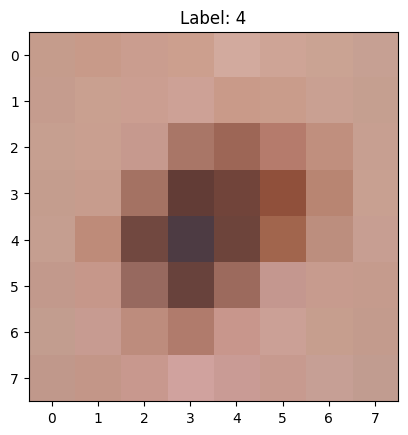

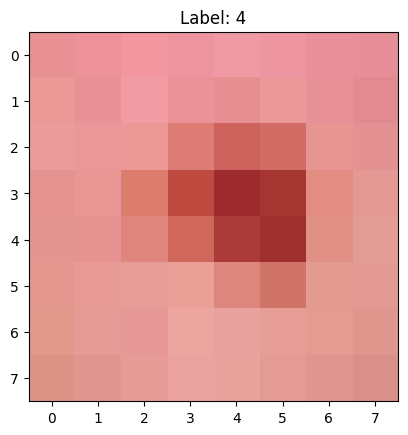

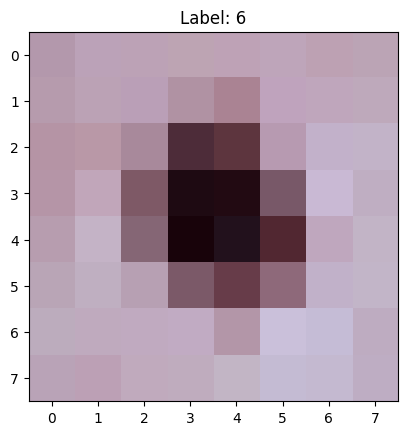

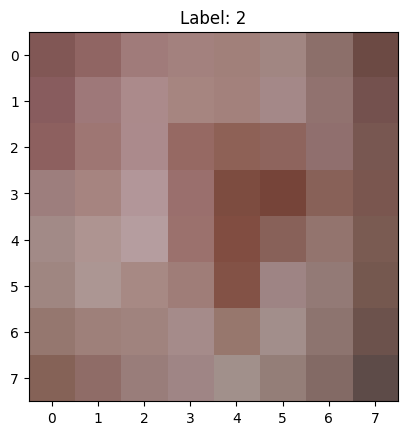

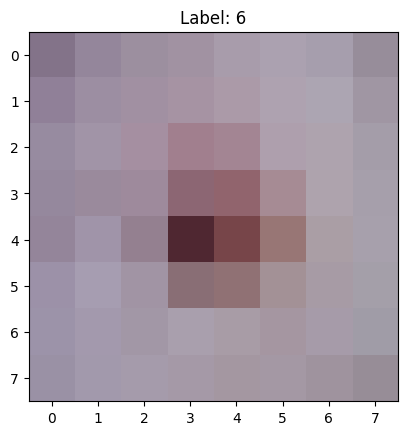

In [21]:
import matplotlib.pyplot as plt

# Display a few images from the dataset
for i in range(5):
    plt.imshow(train_images[i])
    plt.title(f"Label: {train_labels[i]}")
    plt.show()


In [22]:
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(7, activation='softmax'))  # 7 output classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)


In [24]:
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 3)))

# MaxPooling might be too aggressive for this image size, so we'll comment it out
# model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Flatten the layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(7, activation='softmax'))  # 7 output classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


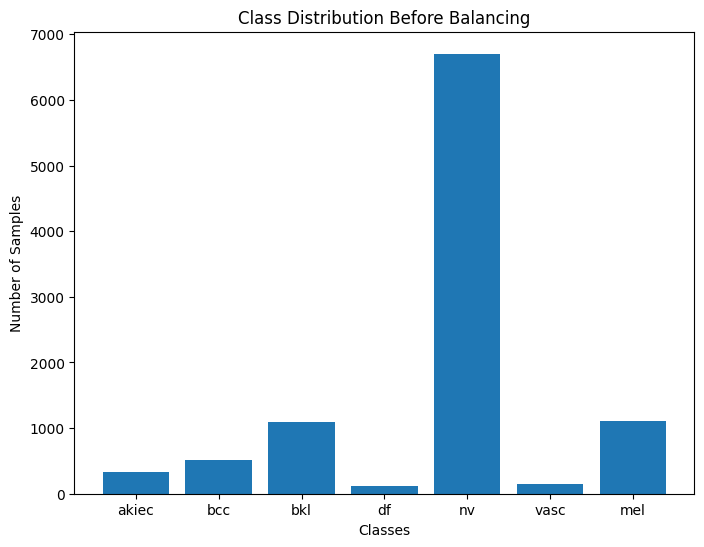

In [25]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the number of instances per class in the original dataset
class_counts = Counter(combined_labels)

# Plotting the distribution
classes = ['akiec', 'bcc', 'bkl', 'df', 'nv', 'vasc', 'mel']

plt.figure(figsize=(8, 6))
plt.bar(classes, [class_counts[i] for i in range(7)])
plt.title("Class Distribution Before Balancing")
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.show()


In [26]:
from sklearn.utils import resample
import numpy as np

# Assuming you have `combined_images` and `combined_labels` as your dataset
X = combined_images
y = combined_labels

# Separate each class
X_classes = [X[y == i] for i in range(7)]
y_classes = [y[y == i] for i in range(7)]

# Find the maximum class size to balance all classes
max_class_size = max([len(c) for c in y_classes])

# Oversample each class to the maximum class size
X_balanced = np.vstack([resample(X_class, replace=True, n_samples=max_class_size, random_state=42) for X_class in X_classes])
y_balanced = np.hstack([resample(y_class, replace=True, n_samples=max_class_size, random_state=42) for y_class in y_classes])

# Shuffle the dataset
shuffled_indices = np.random.permutation(len(y_balanced))
X_balanced = X_balanced[shuffled_indices]
y_balanced = y_balanced[shuffled_indices]


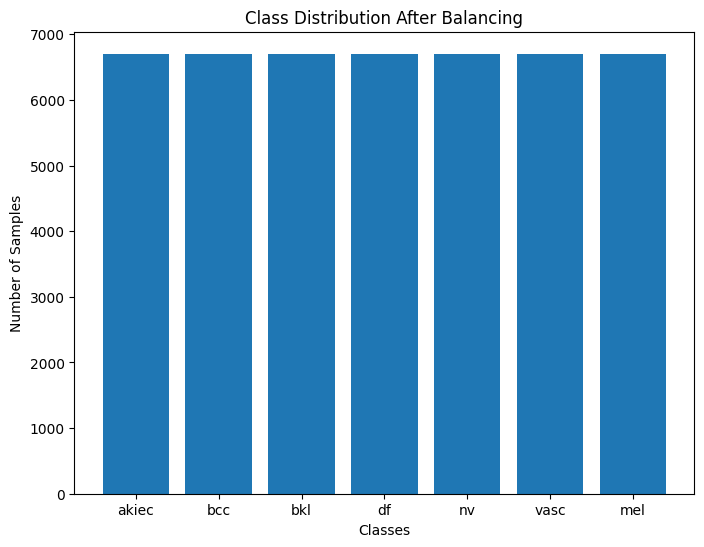

In [33]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the number of instances per class after balancing
balanced_class_counts = Counter(y_balanced)

# Plotting the balanced distribution
classes = ['akiec', 'bcc', 'bkl', 'df', 'nv', 'vasc', 'mel']

plt.figure(figsize=(8, 6))
plt.bar(classes, [balanced_class_counts[i] for i in range(7)])
plt.title("Class Distribution After Balancing")
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.show()


In [34]:
classes = {
    0: 'akiec',  # actinic keratoses and intraepithelial carcinomae
    1: 'bcc',    # basal cell carcinoma
    2: 'bkl',    # benign keratosis-like lesions
    3: 'df',     # dermatofibroma
    4: 'nv',     # melanocytic nevi
    5: 'vasc',   # pyogenic granulomas and hemorrhage
    6: 'mel'     # melanoma
}


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Updated CNN Model Architecture for small input size (8x8)
def create_deep_model():
    model = Sequential()

    # First block (maintain padding='same' to avoid size reduction issues)
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(8, 8, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))  # Use same padding to avoid excessive reduction
    model.add(Dropout(0.25))

    # Second block
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.25))

    # Third block (reduced size of convolution filters)
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.25))

    # Flatten the layers before fully connected layers
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(7, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the updated deep model
model = create_deep_model()

# Summary of the model to check layer shapes
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 32)            │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 2, 2, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,663 (432.28 KB)

 Trainable params: 110,663 (432.28 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Fit the generator on training data
datagen.fit(train_images)


In [52]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
train_labels_one_hot = to_categorical(train_labels, num_classes=7)
test_labels_one_hot = to_categorical(test_labels, num_classes=7)


In [54]:
# Recompile the model to avoid issues
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [55]:
history = model.fit(
    train_images, train_labels_one_hot,
    epochs=20,
    batch_size=32,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[reduce_lr]
)


Epoch 1/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.4775 - loss: 8.2603 - val_accuracy: 0.6241 - val_loss: 1.2507 - learning_rate: 0.0010
Epoch 2/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6035 - loss: 1.1618 - val_accuracy: 0.7072 - val_loss: 1.0854 - learning_rate: 0.0010
Epoch 3/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6442 - loss: 1.0461 - val_accuracy: 0.6882 - val_loss: 0.9309 - learning_rate: 0.0010
Epoch 4/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6767 - loss: 0.9843 - val_accuracy: 0.7068 - val_loss: 0.9156 - learning_rate: 0.0010
Epoch 5/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6721 - loss: 0.9919 - val_accuracy: 0.7077 - val_loss: 0.9017 - learning_rate: 0.0010
Epoch 6/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6919 - loss: 0.9272 - val_accuracy: 0.7095 - val_loss: 0.8621 - learning_rate: 0.0010
Epoch 7/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6941 - loss: 0.9164 

In [58]:
history = model.fit(
    train_images, train_labels_one_hot,
    epochs=50,
    batch_size=32,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[reduce_lr]
)


Epoch 1/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6892 - loss: 0.8640 - val_accuracy: 0.7258 - val_loss: 0.7982 - learning_rate: 0.0010
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7047 - loss: 0.8390 - val_accuracy: 0.7227 - val_loss: 0.7810 - learning_rate: 0.0010
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6928 - loss: 0.8487 - val_accuracy: 0.7254 - val_loss: 0.7881 - learning_rate: 0.0010
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7062 - loss: 0.8302 - val_accuracy: 0.7163 - val_loss: 0.7855 - learning_rate: 0.0010
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7012 - loss: 0.8292 - val_accuracy: 0.7122 - val_loss: 0.7849 - learning_rate: 0.0010
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6938 - loss: 0.8429 - val_accuracy: 0.7272 - val_loss: 0.7872 - learning_rate: 0.0010
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7070 - loss: 0.8155 - 

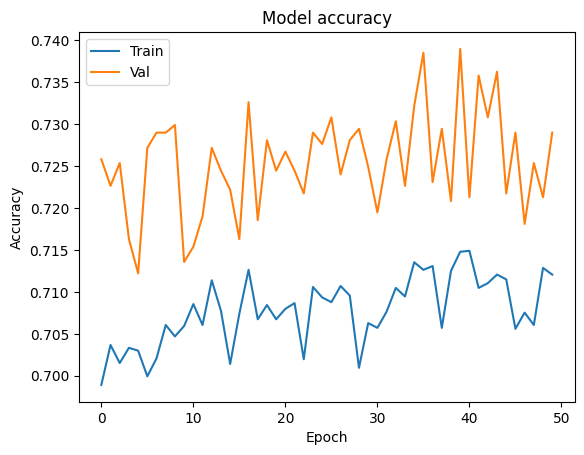

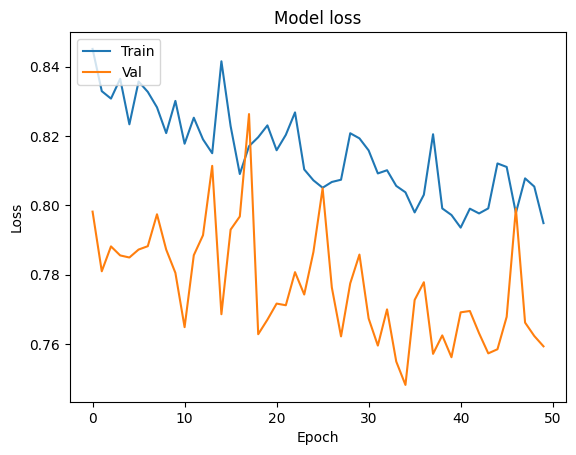

In [59]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [68]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels_one_hot)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")


69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7410 - loss: 0.7263
Test Accuracy: 0.7290058732032776
Test Loss: 0.7593090534210205


69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


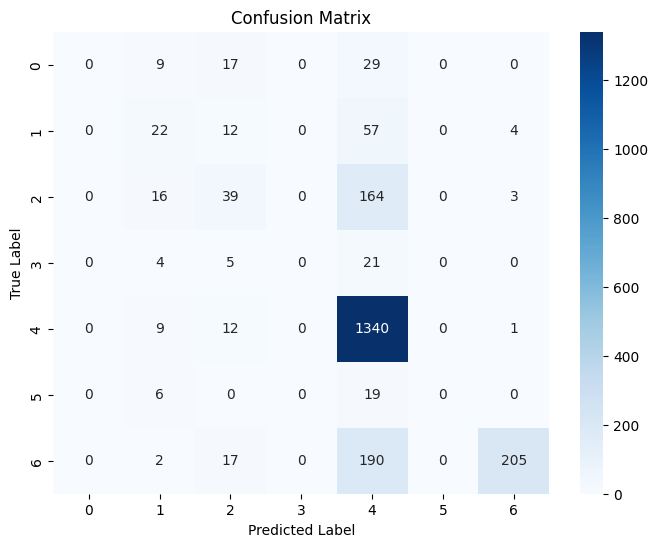

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels_one_hot, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [71]:
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']


In [72]:
from sklearn.metrics import classification_report

# Assuming y_true contains the true labels and y_pred_classes contains the predicted classes
print(classification_report(y_true, y_pred_classes, target_names=class_names))


              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        55
     Class 1       0.32      0.23      0.27        95
     Class 2       0.38      0.18      0.24       222
     Class 3       0.00      0.00      0.00        30
     Class 4       0.74      0.98      0.84      1362
     Class 5       0.00      0.00      0.00        25
     Class 6       0.96      0.50      0.65       414

    accuracy                           0.73      2203
   macro avg       0.34      0.27      0.29      2203
weighted avg       0.69      0.73      0.68      2203



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
from sklearn.metrics import f1_score

y_pred_classes = np.argmax(y_prob, axis=1)
f1 = f1_score(y_test, y_pred_classes, average='macro')
print(f'F1 Score: {f1:.2f}')


F1 Score: 0.29


In [64]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred_classes)
print(f'Cohen\'s Kappa: {kappa:.2f}')


Cohen's Kappa: 0.42


In [65]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred_classes)
print(f'Matthews Correlation Coefficient (MCC): {mcc:.2f}')


Matthews Correlation Coefficient (MCC): 0.47


In [74]:
model.save('skin_cancer_detection_model.h5')
